<a href="https://colab.research.google.com/github/naomifridman/Machine_learning_tutorials_and_utils/blob/master/Agglomerative_Hierarchical_clustering_SciPy_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative / Hierarchical  clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from warnings import filterwarnings
%matplotlib inline

filterwarnings('ignore')

in data mining and statistics, **hierarchical clustering** (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:[1]

> Agglomerative Strategies for hierarchical clustering, is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

<div class="cell text_cell rendered unselected" tabindex="2">
<div class="inner_cell">
<div class="text_cell_render rendered_html" tabindex="-1">
<h1><strong><span style="color: #0000ff;">Hierarchical clustering:</span></strong></h1>
<ol>
<li>
<h3>iteratively&nbsp;<strong>fuses</strong>&nbsp;the data samples one to the other to gradually form clusters.</h3>
</li>
<li>
<h3>at each iteration the data points which are the closest are fused together,</h3>
</li>
<li>
<h3>and their "distance" is recorded.</h3>
</li>
</ol>
<h3><span style="color: #800080;"><strong>When data samples are measured one against the other:</strong></span></h3>
<ul>
<li><strong>their distance is calculated by the&nbsp;<span style="color: #ff0000;">metirc</span>,</strong></li>
</ul>
<h3><span style="color: #800080;"><strong>but when clusters are compared,</strong></span></h3>
<ul>
<li><strong>their distance is measured by a&nbsp;<span style="color: #ff0000;">linkage&nbsp;function</span>.</strong></li>
</ul>
<h3>The representation of this agglomerative process is called&nbsp;<span style="color: #ff0000;"><strong>dendrogram</strong></span>.</h3>
<p>This clustering method is implemented in Scikit-learn under the&nbsp;<a title="AgglomerativeClustering class" href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering" target="_blank" rel="noopener">AgglomerativeClustering</a>&nbsp;class, but it does not support the dendrogram plot, so I refer here directly to SciPy's underlying&nbsp;<a title="cluster.hierarchy module" href="http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html" target="_blank" rel="noopener">cluster.hierarchy</a>&nbsp;module.</p>
</div>
</div>
</div>

## Create  synthetic data

Let's construct an obvious case of three clusters.

In [ ]:
x = np.array([-3, -3, -2, -2,
               1,  2,  2,  2,  3,
              -3, -2, -1])
y = np.array([ 3,  2,  3,  2,
               2,  1,  2,  3,  2,
              -3, -1, -3])

In [ ]:
x = np.array([-3, -3, -2, 
               1,  2,  2,  
              -3, -2, -1])
y = np.array([ 3,  2,  3, 
               2,  1,  2,  
              -3, -1, -3])

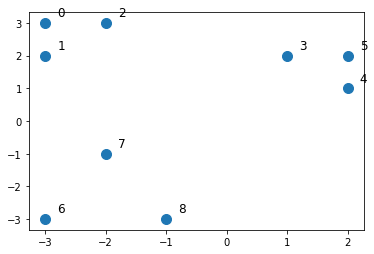

In [ ]:
plt.scatter(x, y, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

## The linkage Matrix

The critical step of the hierarchical clustering is the:
* construction of the **linkage matrix**

### linkage method
The construction applies a **linkage method**, 
* which is a generalization of the **distance** concept to clusters. 

So before we explain the idea behind the linkage concept, let's recall the simpler concept of _metric_ and have a look at the **distance matrix** of the points.

### Distance matrix - pairwise_distances

In [ ]:
points = pd.DataFrame({'x': x, 'y': y})
d = pairwise_distances(points, metric='euclidean')
pd.DataFrame(d)#.ix[:5, :5]

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,1.000000,4.123106,5.385165,5.099020,6.000000,4.123106,6.324555
1,1.000000,0.000000,1.414214,4.000000,5.099020,5.000000,5.000000,3.162278,5.385165
2,1.000000,1.414214,0.000000,3.162278,4.472136,4.123106,6.082763,4.000000,6.082763
3,4.123106,4.000000,3.162278,0.000000,1.414214,1.000000,6.403124,4.242641,5.385165
4,5.385165,5.099020,4.472136,1.414214,0.000000,1.000000,6.403124,4.472136,5.000000
5,5.099020,5.000000,4.123106,1.000000,1.000000,0.000000,7.071068,5.000000,5.830952
6,6.000000,5.000000,6.082763,6.403124,6.403124,7.071068,0.000000,2.236068,2.000000
7,4.123106,3.162278,4.000000,4.242641,4.472136,5.000000,2.236068,0.000000,2.236068
8,6.324555,5.385165,6.082763,5.385165,5.000000,5.830952,2.000000,2.236068,0.000000


At every step of the clustering the algorithm looks for the two nearest clusters (how to define "nearest" is yet unclear, but will be shortly) and combines (agglomerates) them.
<br>
This is implemented by the [linkage()][1] function as follows (taken from SciPy's documentation):

#### Input
The input y may be either a 
* 1d condensed distance matrix or a 
* 2d array of observation vectors.

> If y is a 1d condensed distance matrix, then y must be a  n*(n-1) sized vector where n is the number of original observations paired in the distance matrix. 
#### Output:
* A (n-1, 4)  matrix Z is returned

> The behavior of this function is very similar to the MATLAB linkage function.

[1]: http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage "The linkage() method"

And now for the linkage matrix itself...

In [ ]:
Z = linkage(points, method='complete', metric='euclidean')
Z

array([[  0.        ,   1.        ,   1.        ,   2.        ],
       [  3.        ,   5.        ,   1.        ,   2.        ],
       [  2.        ,   9.        ,   1.41421356,   3.        ],
       [  4.        ,  10.        ,   1.41421356,   3.        ],
       [  6.        ,   8.        ,   2.        ,   2.        ],
       [  7.        ,  13.        ,   2.23606798,   3.        ],
       [ 11.        ,  12.        ,   5.38516481,   6.        ],
       [ 14.        ,  15.        ,   7.07106781,   9.        ]])

Originially, Z is an _Array_, so for convenience we wrap it with a _DataFrame_ with explanatory column names. 
<br>
In addition, to make the clustering process more clear, we add an informative column with the enumeration of the newly formed cluster in each step.
<br>
#### The calculation Process:
 * At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n+1.
 * A cluster with an index less than n corresponds to one of the n original observations. 
 * The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. 
 * The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [ ]:
Z.shape

(8, 4)

In [ ]:
Z_df = pd.DataFrame({'clst_1':pd.Series(Z[:,0], dtype=int),
                   'clst_2':pd.Series(Z[:,1], dtype=int),
                    'distance':pd.Series(Z[:,2], dtype=float),
                    'clst_size':pd.Series(Z[:,3], dtype=int),
                    'new_clst':pd.Series(new_clst, dtype=int)})
                    
Z_df

,clst_1,clst_2,distance,clst_size,new_clst
0,0,1,1.000000,2,8
1,3,5,1.000000,2,9
2,2,9,1.414214,3,10
3,4,10,1.414214,3,11
4,6,8,2.000000,2,12
5,7,13,2.236068,3,13
6,11,12,5.385165,6,14
7,14,15,7.071068,9,15


## The dendrogram

The process of building the linkage matrix is represented by special plot called dendrogram. Its x-axis is simply the numbers of the data points, and its y-axis is the linkage value. This visualization is achieved by the [dendrogram][1] function, and apart from the plot itself, some representation information is returned as a dictionary.

[1]: http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html "dendrogram API"

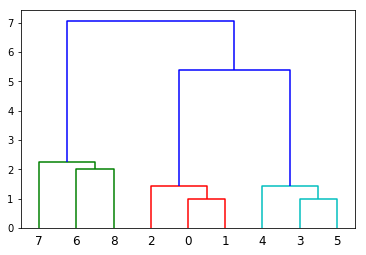

In [ ]:
dn = dendrogram(Z)

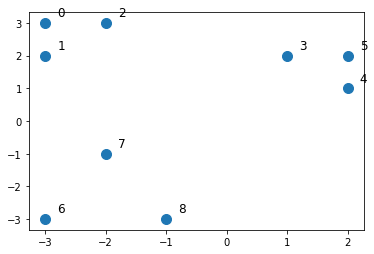

In [ ]:
plt.scatter(x, y, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

## Clustering with linkage matrix

#### In order to extract the clusters from the dendrogram, all we have to do is to "cut" the dendrogram in some linkage value. 

This is performed by the [fcluster][fclust] function, which returns an array of integers in the length of the number of data points, in which each number corresponds to the cluster to which the data sample belongs.

[fclust]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html "fcluster() API"
### Cluster to 2 clusters

[2 2 2 2 2 2 1 1 1]


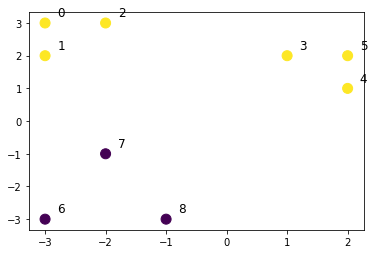

In [ ]:
cluster = fcluster(Z, t=2, criterion='maxclust')
print(cluster)

plt.scatter(x, y, c=cluster, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

### Cluster to 3 clusters

[2 2 2 3 3 3 1 1 1]


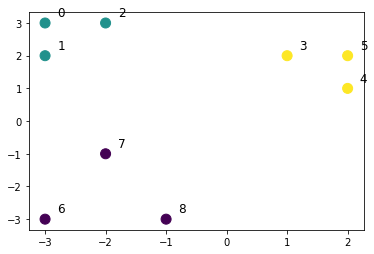

In [ ]:
cluster = fcluster(Z, t=3, criterion='maxclust')
print(cluster)
plt.scatter(x, y, c=cluster, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

### Cluster to 4 clusters

[3 3 3 4 4 4 1 2 1]


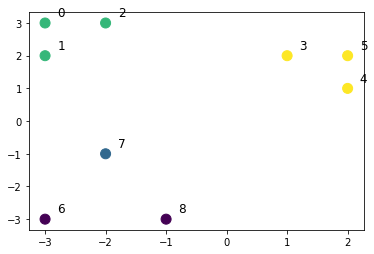

In [ ]:
cluster = fcluster(Z, t=4, criterion='maxclust')
print(cluster)
plt.scatter(x, y, c=cluster, s=100)
for i, (a, b) in enumerate(zip(x, y)):
    plt.text(a+0.2, b+0.2, str(i), size=12)

# Understanding the linkage functions

#### Just like the metric has a significant role in determining classifications and clustering, the linkage is also important. 
There  are several common linkage functions that are used, and they are all documented in the linkage() function. The most widely used linkages are: 

* **average** - sum of distance between all pair (a,b) where a,b in different clusters, devided by data size $|A|*|B|$
* **complete** - maximum of the distance between all pair (a,b) where a,b in different clusters.
* **single** - minimum of the distance between all pair (a,b) where a,b in different clusters.
* **Ward** - minimizes the variant between the clusters.

### Visualize with weight data-set
Load ,normalize and sample

In [ ]:
weights = pd.read_csv("weight.txt")
weights['Height'] = MinMaxScaler().fit(weights[['Height']]).transform(weights[['Height']])
weights['Weight'] = MinMaxScaler().fit(weights[['Weight']]).transform(weights[['Weight']])
print(weights.shape)
df = weights.sample(200)

(1000, 4)


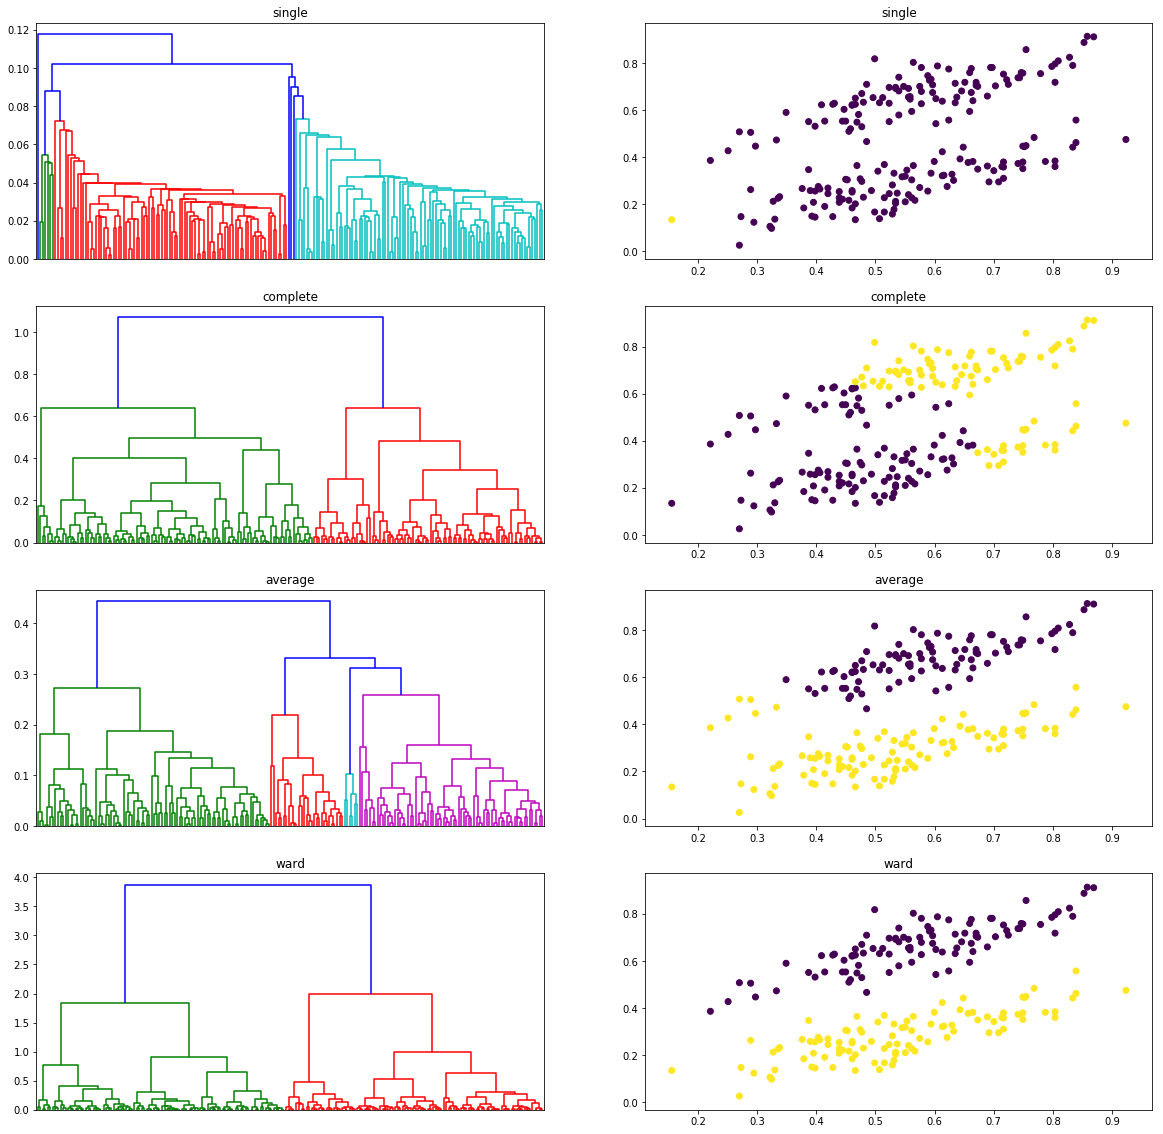

In [ ]:
plt.figure(figsize=(20,20))
methods = ['single', 'complete','average' ,'ward' ]

for i, method in enumerate(methods, 1):
    
    ax= plt.subplot(4, 2, 2*(i-1)+1)
    Z = linkage(df[['Height', 'Weight']], method=method, 
                metric='euclidean')
    dn = dendrogram(Z)
    ax.set_xticklabels([])
    plt.title(method)
    
    plt.subplot(4, 2, 2*(i-1)+2)
    cluster_lable = fcluster(Z, 2, criterion='maxclust')
    plt.scatter(df.Height, df.Weight, 
            c=cluster_lable)#, s=100)
    plt.title(method)

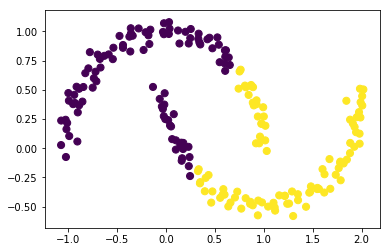

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

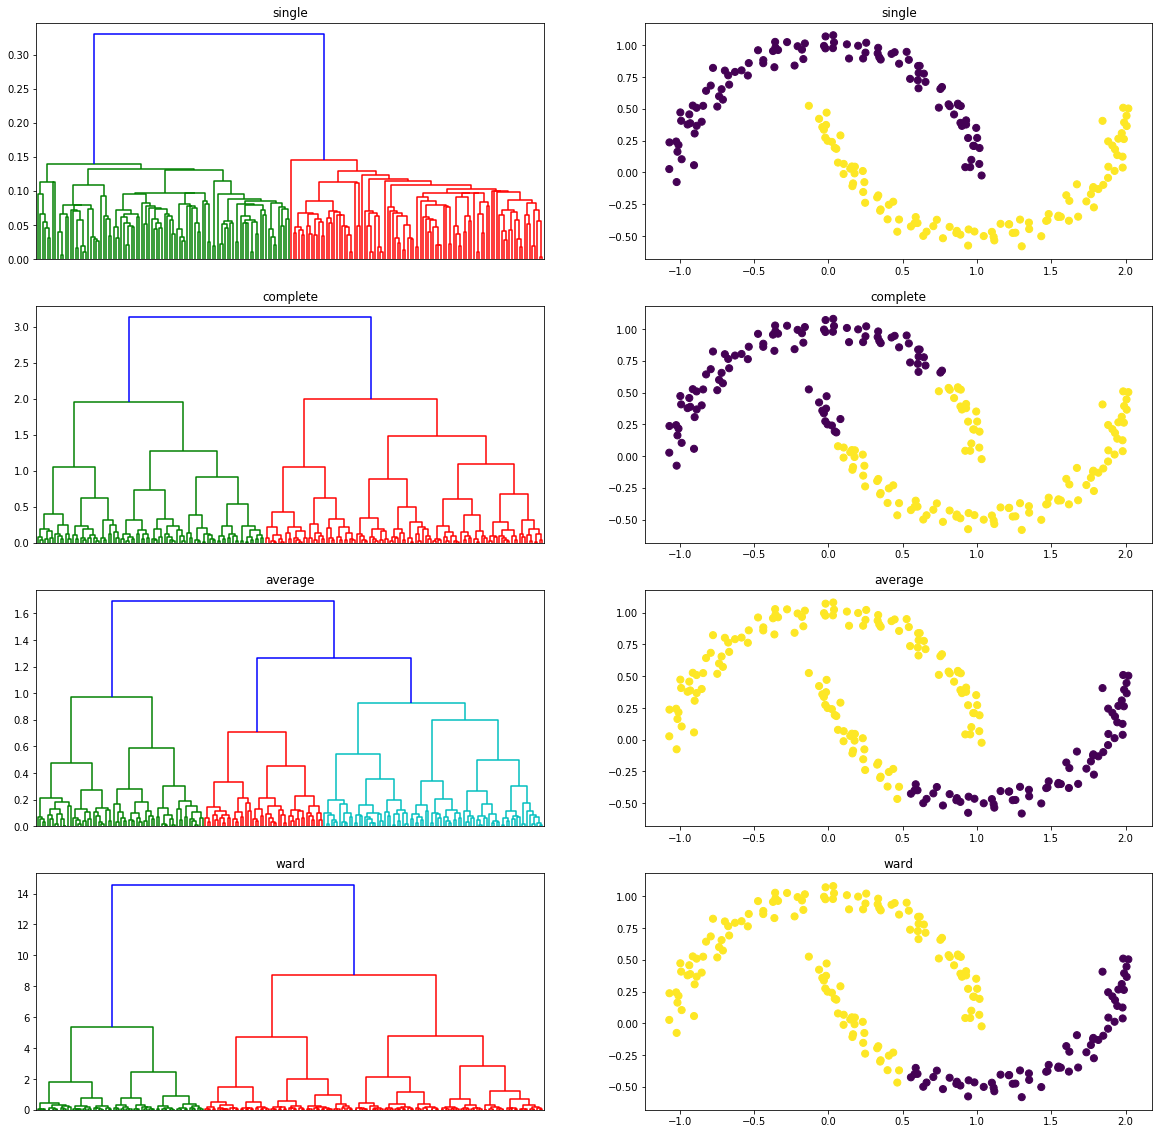

In [ ]:
plt.figure(figsize=(20,20))
methods = ['single', 'complete','average' ,'ward' ]

for i, method in enumerate(methods, 1):
    
    ax= plt.subplot(4, 2, 2*(i-1)+1)
    Z = linkage(X, method=method, 
                metric='euclidean')
    dn = dendrogram(Z)
    ax.set_xticklabels([])
    plt.title(method)
    
    plt.subplot(4, 2, 2*(i-1)+2)
    cluster_lable = fcluster(Z, 2, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=cluster_lable,
            s=50, cmap='viridis');
    plt.title(method)

### Visualize moon with 3 clusters

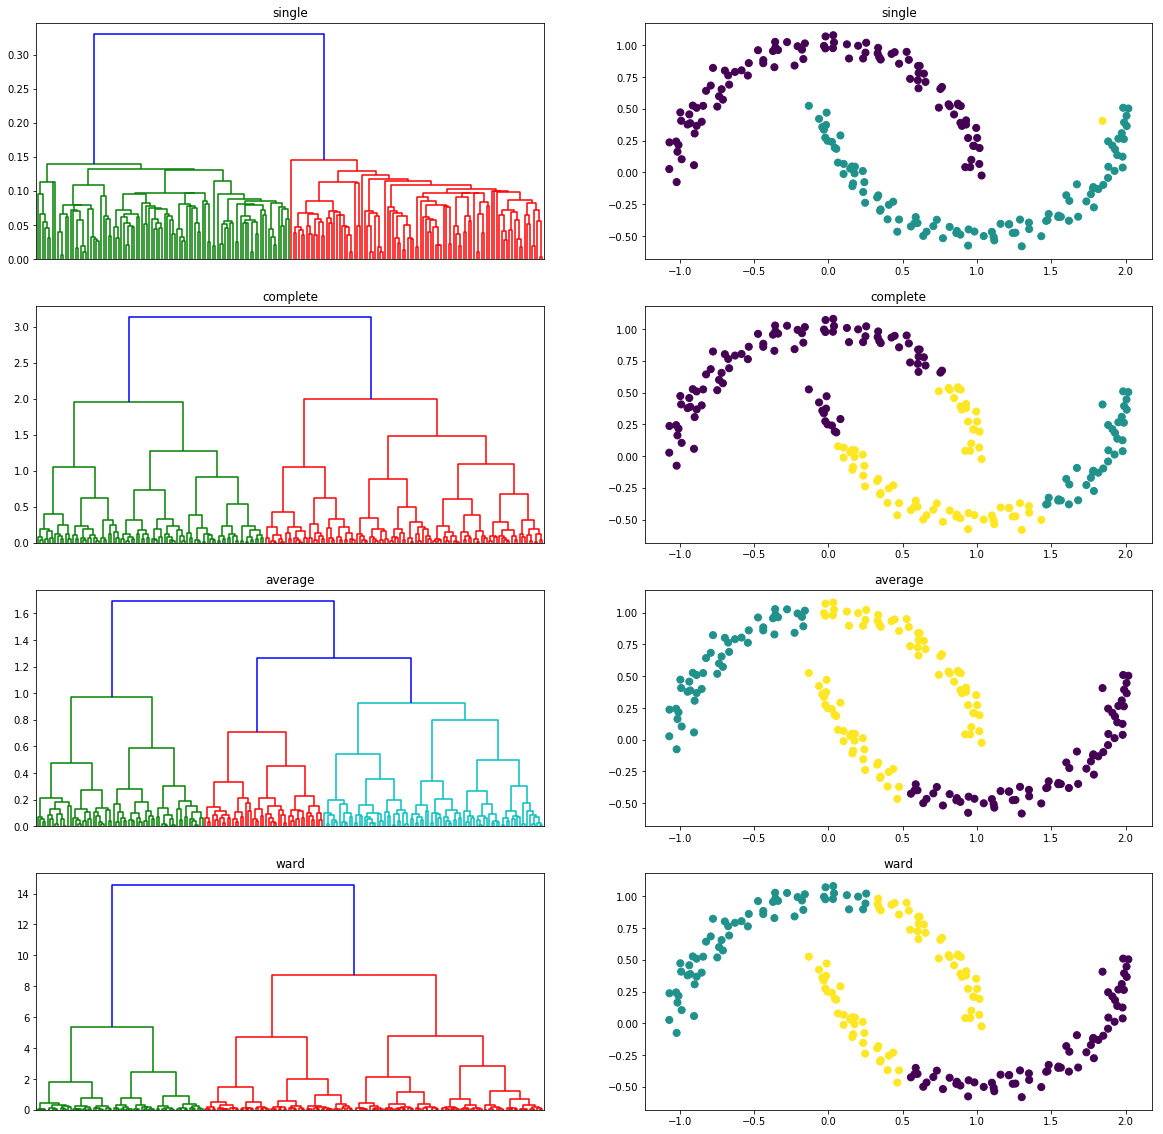

In [ ]:
plt.figure(figsize=(20,20))
methods = ['single', 'complete','average' ,'ward' ]

for i, method in enumerate(methods, 1):
    
    ax= plt.subplot(4, 2, 2*(i-1)+1)
    Z = linkage(X, method=method, 
                metric='euclidean')
    dn = dendrogram(Z)
    ax.set_xticklabels([])
    plt.title(method)
    
    plt.subplot(4, 2, 2*(i-1)+2)
    cluster_lable = fcluster(Z, 3, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=cluster_lable,
            s=50, cmap='viridis');
    plt.title(method)

#### Visualize moon with 4 clusters

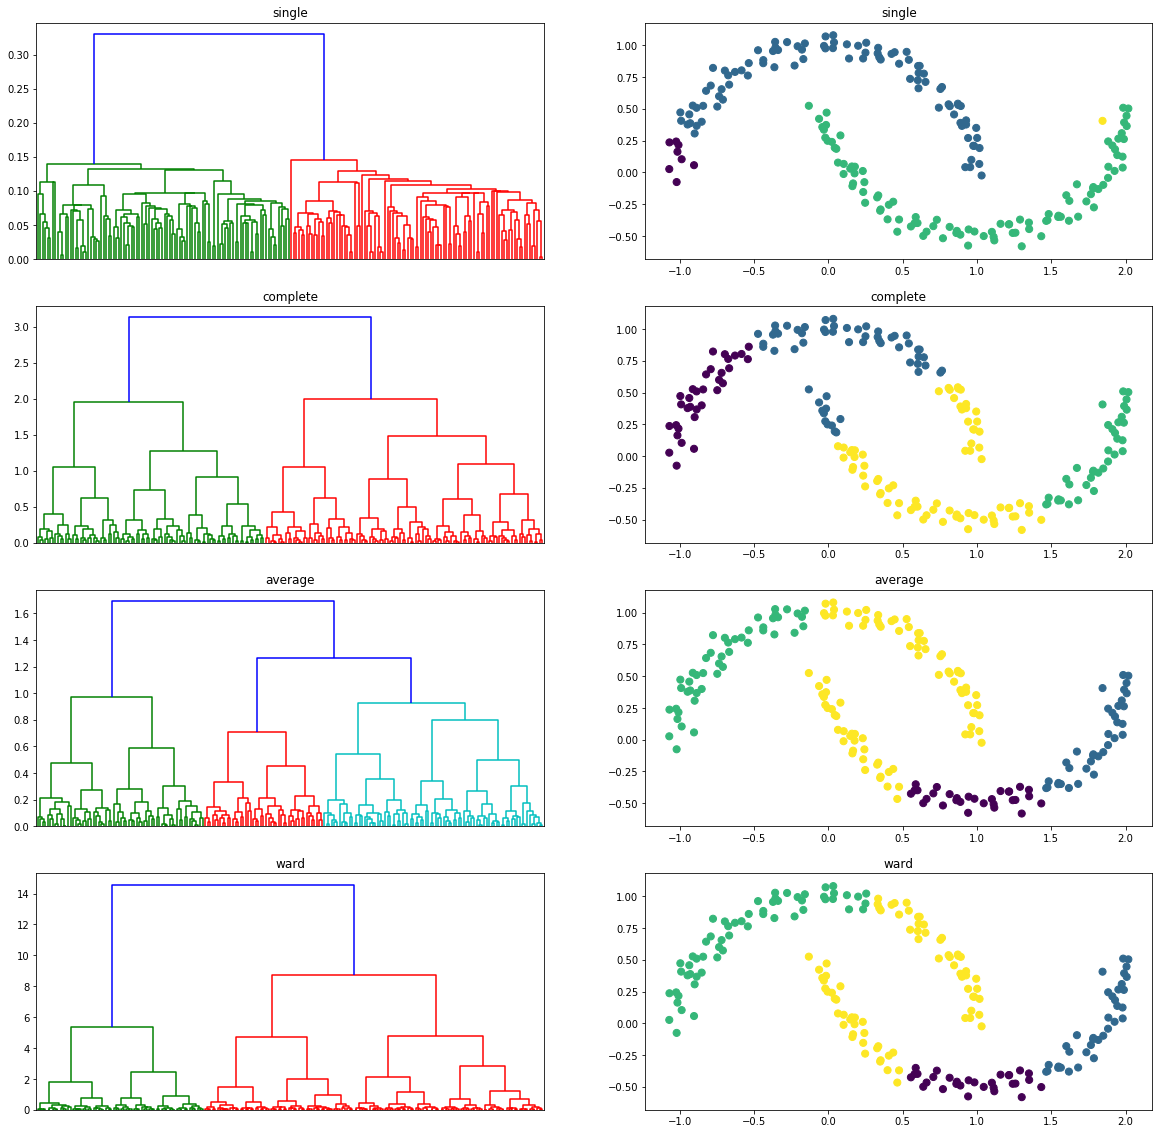

In [ ]:
plt.figure(figsize=(20,20))
methods = ['single', 'complete','average' ,'ward' ]

for i, method in enumerate(methods, 1):
    
    ax= plt.subplot(4, 2, 2*(i-1)+1)
    Z = linkage(X, method=method, 
                metric='euclidean')
    dn = dendrogram(Z)
    ax.set_xticklabels([])
    plt.title(method)
    
    plt.subplot(4, 2, 2*(i-1)+2)
    cluster_lable = fcluster(Z, 4, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=cluster_lable,
            s=50, cmap='viridis');
    plt.title(method)

## Visualized summary
This example shows characteristics of different linkage methods for hierarchical clustering on datasets that are “interesting” but still in 2D.
<br>
The main observations to make are:

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.
While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

### Sk-learn implementation

Automatically created module for IPython interactive environment


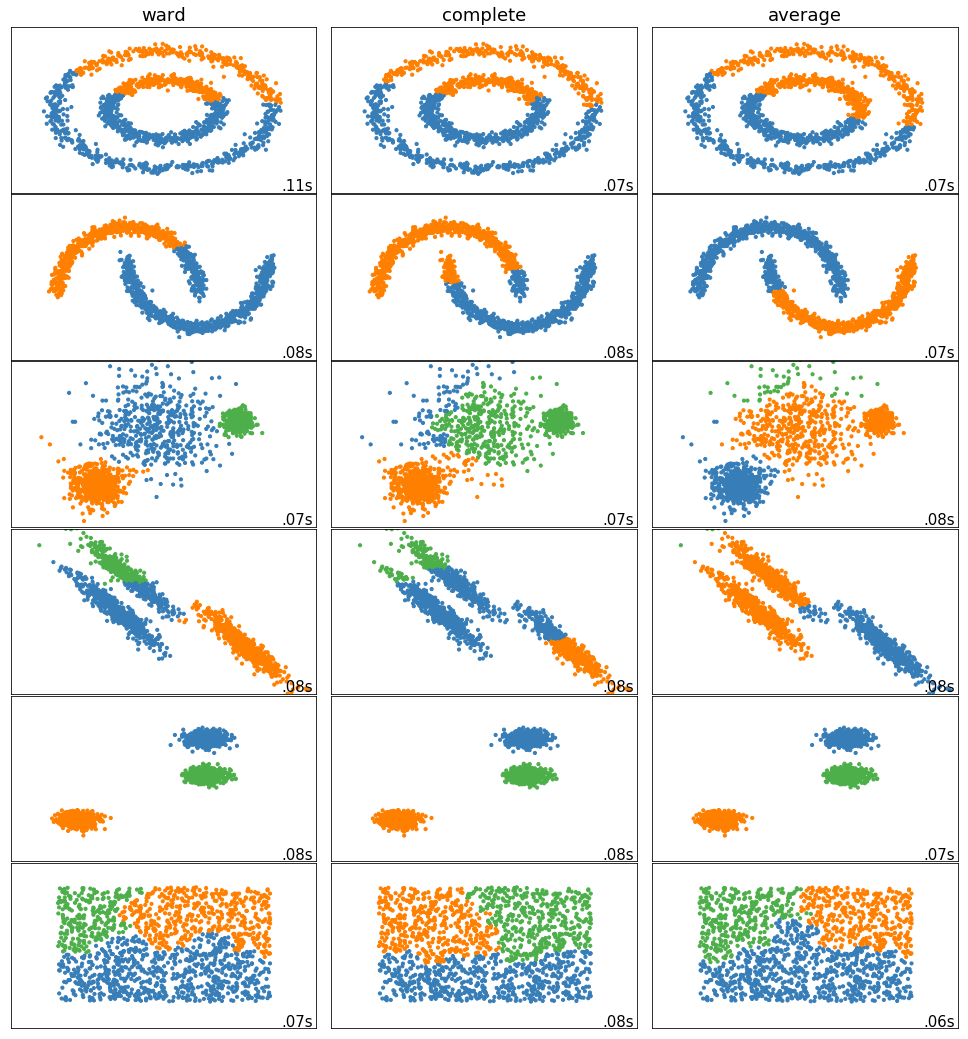

In [ ]:
print(__doc__)

import time
import warnings

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability of
# the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# Run the clustering and plot
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    methods = ['ward','complete','average']#,'single' ]

    #for name, algorithm in clustering_algorithms:
    for method in (methods):
        t0 = time.time()

        algorithm=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], 
                                                  linkage=str(method))
        algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        
        plt.subplot(6,3, plot_num)
        if i_dataset == 0:
            plt.title(method, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()